## Table of Contents 
0. Revisions
   - [Currency 'Patch'.](#Currency-Patch.)
   - [Borrowers' 'Patch'.](#Borrowers'-Patch.)

1. [Getting Started](#getting-started)

2. [Warm Up Section](#warm-up-section)
   - [Overview Of Loan Metrics in Rwanda](#overview-of-loan-metrics-in-rwanda)
   - [Loan Distribution Across Sectors](#loan-distribution-across-sectors)
   - [Partners (quick look)](#Partners-quick-look)

2. [Understanding Borrower Pool](#Understanding-Borrower-Pool)
   - [Borrower Distribution Across Activities (Individual Loans)](#Borrower-Distribution-Across-Activities-Individual-Loans)
   - [Dissecting Borrower Types](#Dissecting-Borrower-Types)
   - [Loan Distribution Across Borrower Types](#Loan-Distribution-Across-Borrower-Types)

3. [Trends Across Time](#Trends-Across-Time)
   - [Preprocessing](#Preprocessing)
   - [How Long Does It Take ?](#HowLong-Does-It-Take-?)
   - [Trends In Loan Funding Over The Years](#Trends-In-Loan-Funding-Over-The-Years)
   - [Trends In Loan Funding Within The Years](#Trends-In-Loan-Funding-Within-The-Years)

4. [Language Processing Using NLTK](#Language-Processing-Using-NLTK)

5. [Completing 2017](#Predictive-Analytics-using-Linear-Regression)

6. [Final Reflections](#glad-you-made-it-to-the-very-end)

### KIVA DATASET ANALYSIS (Rwanda emphasis).

### Getting Started

imports, exploration, cleaning; making my data useable

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data = pd.read_csv('kiva_loans.csv')

In [63]:
data.country.unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [64]:
rwanda_data = data[data.country=='Rwanda']

In [65]:
# check for null values

rwanda_data.isnull().sum()/len(rwanda_data)*100

id                     0.000000
funded_amount          0.000000
loan_amount            0.000000
activity               0.000000
sector                 0.000000
use                    0.222717
country_code           0.000000
country                0.000000
region                91.135857
currency               0.000000
partner_id             0.000000
posted_time            0.000000
disbursed_time         0.000000
funded_time            8.195991
term_in_months         0.000000
lender_count           0.000000
tags                  24.231626
borrower_genders       0.207869
repayment_interval     0.000000
date                   0.000000
dtype: float64

In [66]:
# check for duplicates

data.duplicated().sum()

np.int64(0)

In [67]:
rwanda_data.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [68]:
t_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
for col in t_cols:
    rwanda_data[col] = pd.to_datetime(rwanda_data[col], utc=True)

<positron-console-cell-68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-68>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-68>:3: SettingWithCopyW

In [69]:
rwanda_data.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                           object
sector                             object
use                                object
country_code                       object
country                            object
region                             object
currency                           object
partner_id                        float64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                    float64
lender_count                        int64
tags                               object
borrower_genders                   object
repayment_interval                 object
date                  datetime64[ns, UTC]
dtype: object

#### Currency Patch.

block of code to convert all loans to a single currency (USD) in cell 19.
after this 'patch' the prediction model collapsed and average loans were suspiciously low. a web search and ai consultation reports that the currency column acts as metadata to inform
us of what the local currency was. by applying this patch i was essentialy performing a double conversion reporting  even smaller values.


In [70]:
rwanda_data.currency.value_counts()

currency
RWF    6711
USD      24
Name: count, dtype: int64

In [71]:
# using year-respective conversion rates all loans are normalised

# rates = {2014: 675, 2015: 700, 2016: 770, 2017: 825}

# year_series = rwanda_data.disbursed_time.dt.year
# rate_map = year_series.map(rates)

# mask = rwanda_data.currency == 'RWF'

# rwanda_data.loc[mask, 'loan_amount'] = rwanda_data.loc[mask, 'loan_amount'] / rate_map

# rwanda_data.loc[mask, 'currency'] = 'USD'

# rwanda_data.currency.value_counts()

### Warm Up Section

getting to know my data.

In [72]:
# top 5 countries sorted by sum of disbursed loans

data.groupby('country').loan_amount.sum().sort_values(ascending=False).head(5)

country
Philippines      55342225.0
Kenya            34534300.0
United States    31496375.0
Peru             30867400.0
Paraguay         29629075.0
Name: loan_amount, dtype: float64

#### Overview Of Loan Metrics in Rwanda

In [73]:
# disbursed loans metrics

l_count = rwanda_data.loan_amount.count()
l_sum = rwanda_data.loan_amount.sum()
l_avg = rwanda_data.loan_amount.mean()

print(f'a total of {l_count} loans, adding up to USD{l_sum: .2f} \nand an average loan amount of USD{l_avg: .2f}')

a total of 6735 loans, adding up to USD 16646300.00 
and an average loan amount of USD 2471.61


#### Loan Distribution Across Sectors

In [74]:
# loan distribution across sectors

rwanda_data.sector.nunique()

15

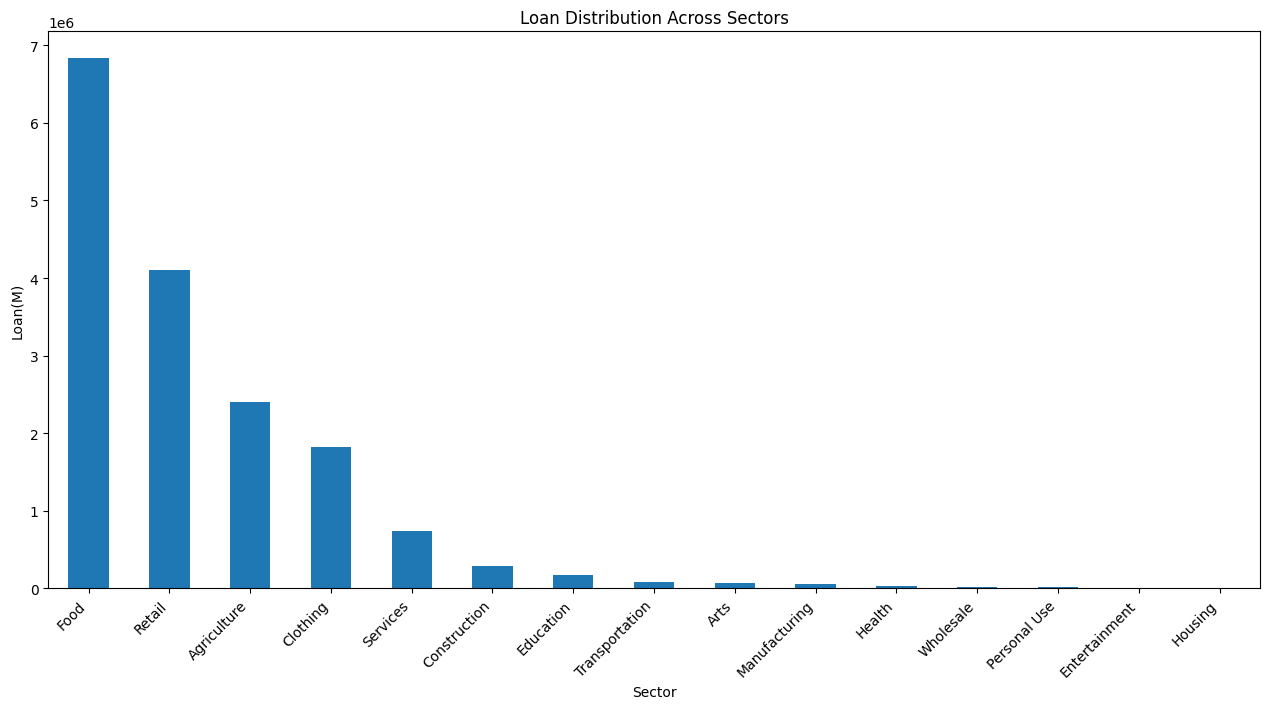

In [75]:
sector_dist = rwanda_data.groupby('sector').loan_amount.sum().sort_values(ascending=False)
sector_dist.plot(kind='bar', title='Loan Distribution Across Sectors', ylabel='Loan(M)', xlabel='Sector', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# sector_dist.head(5)

#### Partners (quick look)

In [76]:
# number of unique partners and most involved partners by loan amount

id_count = len(rwanda_data.partner_id.unique())
id_ranking = rwanda_data.groupby('partner_id').loan_amount.sum().sort_values(ascending=False)

print(f'Rwanda has {id_count} unique partners.')

Rwanda has 8 unique partners.


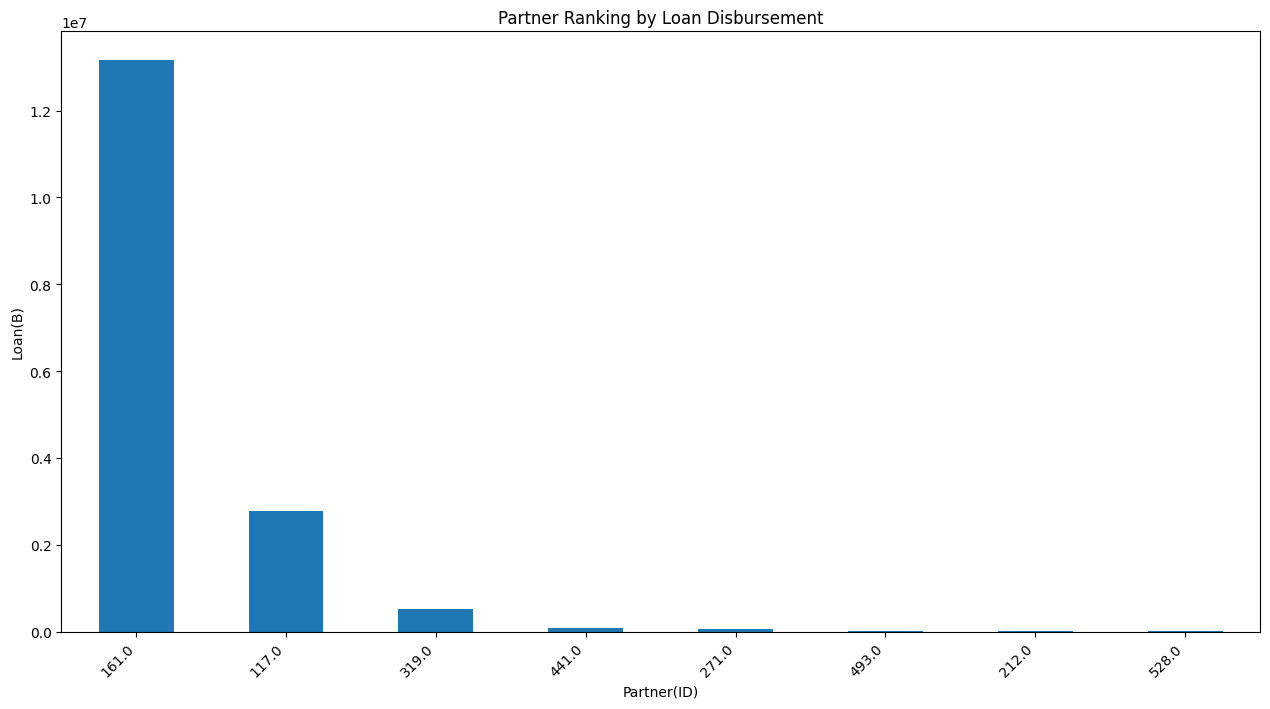

In [77]:
id_ranking.plot(kind='bar', title='Partner Ranking by Loan Disbursement', ylabel='Loan(B)', xlabel='Partner(ID)', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Understanding Borrower Pool

In [78]:
# borrower distribution by gender within activities

g_distm = rwanda_data[rwanda_data.borrower_genders=='male'].groupby('activity').size().rename('Male').sort_values(ascending=True)
g_distf = rwanda_data[rwanda_data.borrower_genders=='female'].groupby('activity').size().rename('Female').sort_values(ascending=True)
gender_counts = pd.concat([g_distm, g_distf], axis=1).dropna(axis=0)

In [79]:
print(g_distm.sum())
print(g_distf.sum())

1540
2316


#### Borrower Distribution Across Activities (Individual Loans)

In [80]:
g_dist_cent = (gender_counts.Male>gender_counts.Female).sum()/len(gender_counts)*100
print(f'Males account for only{g_dist_cent: .2f}% (1540) of all borrowers in Rwanda.\nFemales take up the remaining{100 - g_dist_cent: .2f}% (2316).\nWhile this represents individual loans, group loans are similarly distributed with female-only groups being the most represented.')

Males account for only 27.12% (1540) of all borrowers in Rwanda.
Females take up the remaining 72.88% (2316).
While this represents individual loans, group loans are similarly distributed with female-only groups being the most represented.


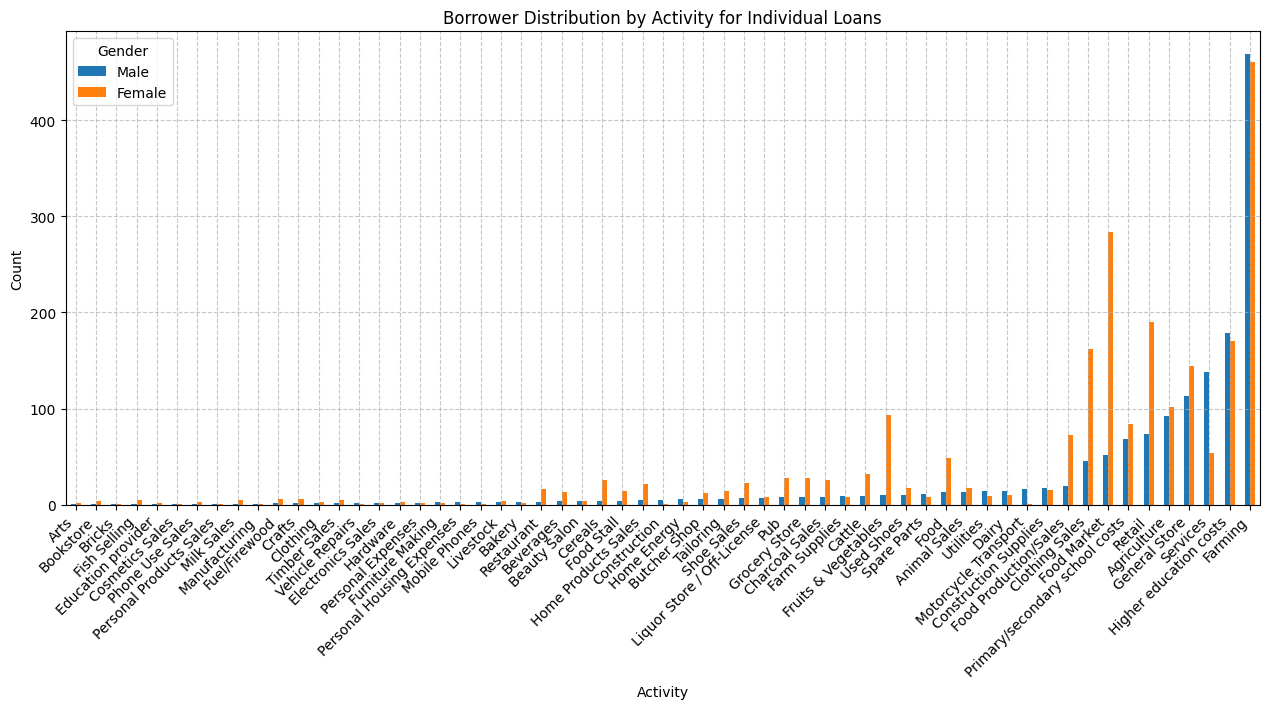

In [81]:
gender_counts.plot(kind='bar', title='Borrower Distribution by Activity for Individual Loans', xlabel='Activity', ylabel='Count', figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Borrowers' Patch.

rows under borrower_genders with multiple entries could indicate groups/saccos/welfares with own unique trends.

In [82]:
# quick display of the 'problem'

rwanda_data.borrower_genders.value_counts()

borrower_genders
female                                                                                                                                                                                                                                                                                                                                                                2316
male                                                                                                                                                                                                                                                                                                                                                                  1540
female, female, female, female, female, female, female, female, female, female                                                                                                                                                                                   

In [83]:
# some filtering to get a 'groups only' dataframe

gender_targets = ['male', 'female']
rwanda_data_groups = rwanda_data[~rwanda_data.borrower_genders.isin(gender_targets)]

print(f'Of the {len(rwanda_data)} loans in disbursed in Rwanda, {len(rwanda_data_groups)} loans are taken by groups.')

Of the 6735 loans in disbursed in Rwanda, 2879 loans are taken by groups.


#### Dissecting Borrower Types

In [84]:
# some string manipulation to obtain group sizes under a new column; 'borrower_count'

rwanda_data['borrower_count'] = rwanda_data['borrower_genders'].str.split(',').str.len()
rwanda_data['borrower_count'] = rwanda_data['borrower_count'].fillna(0).astype(int)

# define bins and labels for unique group types

bins = [0, 1, 3, 8, 15, 100]
labels = ['Individual', 'Small Group (2-3)', 'Medium Group (4-8)', 'Large Group (9-15)', 'Sacco/Large Cluster']

rwanda_data['group_type'] = pd.cut(rwanda_data['borrower_count'], bins=bins, labels=labels)

<positron-console-cell-84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<positron-console-cell-84>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
# compare average loan amount and repayment term by group type

analysis = rwanda_data.groupby('group_type')[['loan_amount', 'term_in_months']].describe()
analysis

<positron-console-cell-85>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


loan_amount                            ... term_in_months             
                          count         mean          std  ...            50%    75%   max
group_type                                                 ...                            
Individual               3856.0  1023.482884  1882.221752  ...            8.0  12.00  41.0
Small Group (2-3)          38.0   632.236842  1274.157219  ...           37.0  37.75  40.0
Medium Group (4-8)        160.0  4515.156250  2613.941361  ...            8.0  14.00  40.0
Large Group (9-15)       1249.0  3738.670937  2109.780233  ...            8.0   9.00  34.0
Sacco/Large Cluster      1418.0  5115.761636  2139.618175  ...            6.0   6.00  18.0

[5 rows x 16 columns]

In [1]:
# visualizing loan distribution across different group types

type_counts = rwanda_data['group_type'].value_counts()

type_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, title='Loan Distribution by Group Type', ylabel='')

plt.tight_layout()

NameError: name 'rwanda_data' is not defined

#### Loan Distribution Across Borrower Types

<positron-console-cell-87>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


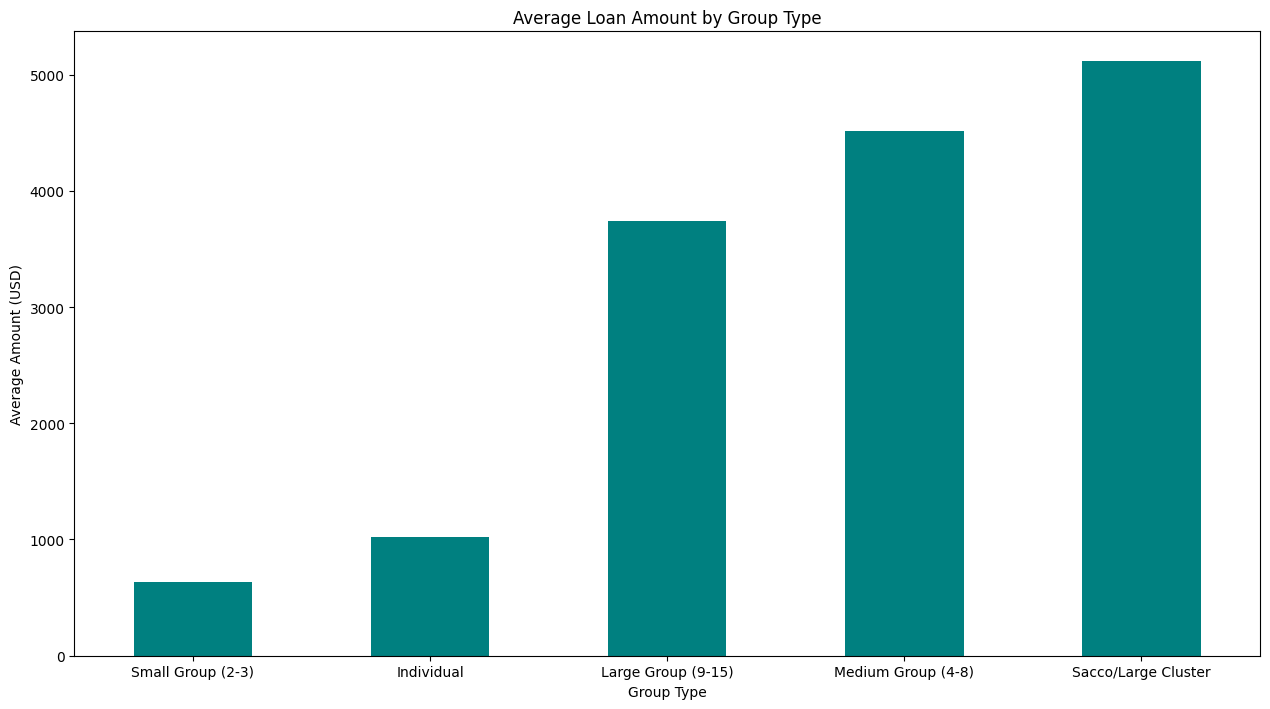

In [87]:
# visualizing loan amount across groups to identify any trends/relationship

mean_loans = rwanda_data.groupby('group_type')['loan_amount'].mean().sort_values()

mean_loans.plot(kind='bar',figsize=(12.8, 7.2), color='teal', title='Average Loan Amount by Group Type', ylabel='Average Amount (USD)', xlabel='Group Type')
plt.xticks(rotation=0)
plt.tight_layout()

In [88]:
# loan amounts by region
# the region column had the highest percentage of null values
# we'll work with only available data

region_data = rwanda_data.dropna(subset=['region'])

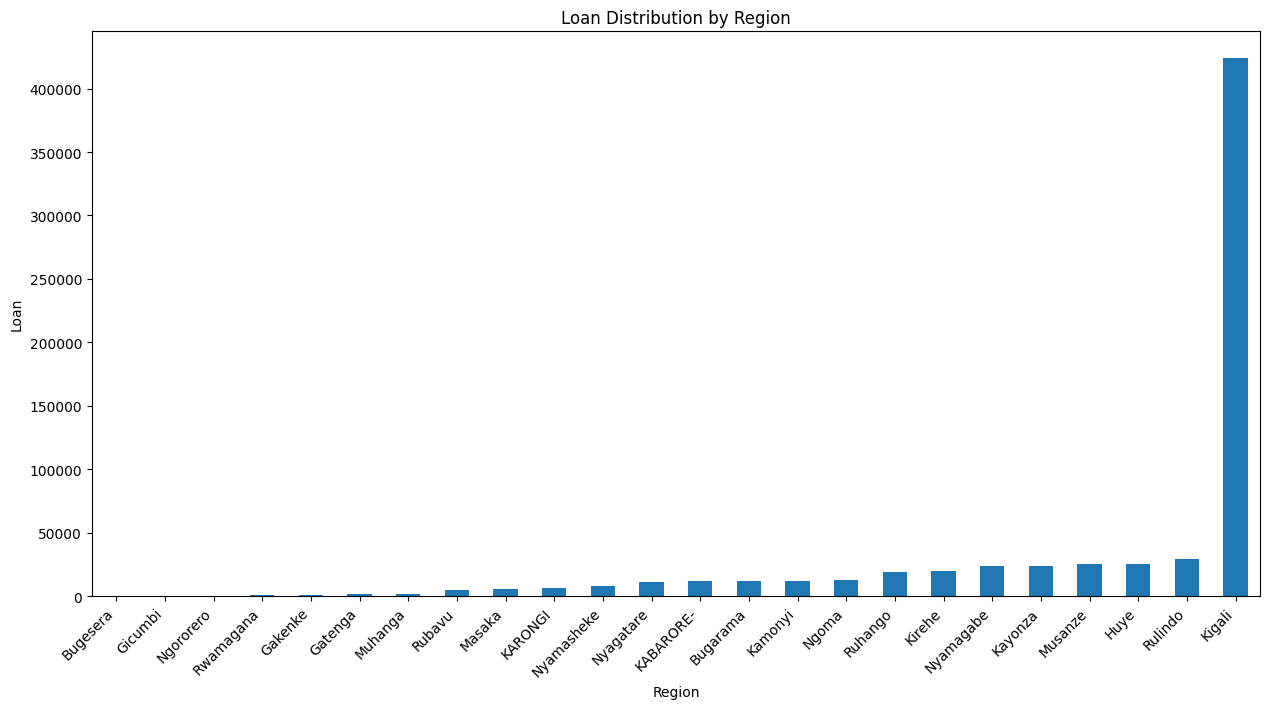

In [89]:
regionl_data = region_data.groupby('region').loan_amount.sum().sort_values(ascending=True)
regionl_data.plot(kind='bar', title='Loan Distribution by Region', xlabel='Region', ylabel='Loan',figsize=(12.8, 7.2))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

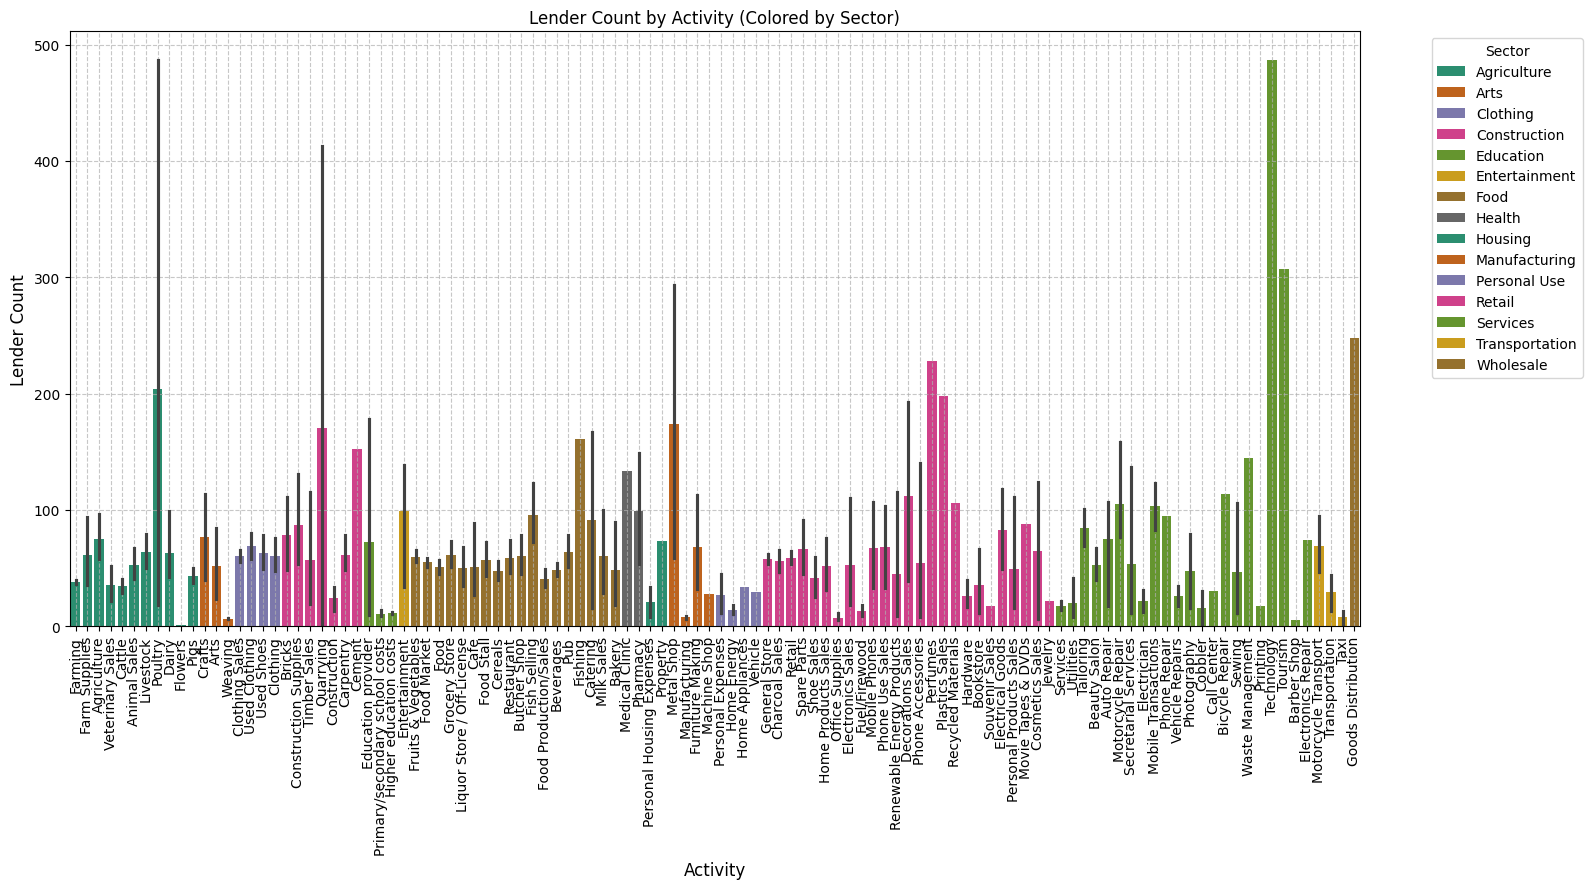

In [90]:
# how the number of lenders vary across different activities

grp_rwanda_data = rwanda_data.sort_values(by= 'sector', ascending=True)

plt.figure(figsize=(16, 9))
sns.barplot(data=grp_rwanda_data, x='activity', y='lender_count', hue='sector', palette='Dark2', dodge=False)
plt.title('Lender Count by Activity (Colored by Sector)')
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Lender Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [91]:
# lender count by different sector

def print_avg_lender_count_by_sector(rwanda_data):
    grouped = rwanda_data.groupby('sector').lender_count.mean()
    print(grouped)

print_avg_lender_count_by_sector(rwanda_data)

sector
Agriculture        46.051554
Arts               63.409091
Clothing           61.044563
Construction       79.772727
Education          11.401186
Entertainment      99.333333
Food               55.159101
Health            103.625000
Housing            31.400000
Manufacturing      88.333333
Personal Use       18.347826
Retail             57.587674
Services           37.128266
Transportation     61.451613
Wholesale         248.000000
Name: lender_count, dtype: float64


In [92]:
# average loan repayment interval function probably works for tag distribution as well

def get_percentage_distribution(df, column_name, top_n=10):
    distribution = df[column_name].value_counts(normalize=True, sort=True) * 100
    
    # tweak
    if len(distribution) > top_n:
        top_items = distribution.head(top_n)
        others_pct = (distribution.tail(-top_n).sum()).round(2)
        display_items = pd.concat([top_items, pd.Series({'Others': others_pct})])
    else:
        display_items = distribution
    
    for tag, percentage in display_items.items():
        print(f"{tag}: {percentage:.2f}%")


get_percentage_distribution(rwanda_data, 'tags', top_n=10)


user_favorite: 6.45%
#Parent: 3.37%
#Parent, #Woman Owned Biz: 2.68%
#Parent, #Woman Owned Biz, user_favorite: 1.74%
#Parent, user_favorite: 1.69%
user_favorite, user_favorite: 1.47%
#Parent, #Vegan: 1.41%
#Parent, #Schooling, #Woman Owned Biz: 1.33%
#Parent, #Schooling: 1.31%
#Parent, #Woman Owned Biz, user_favorite, user_favorite: 0.98%
Others: 77.56%


### Trends Across Time

#### Preprocessing

In [93]:
# trends across time
# features to examined; funded amount(yearly trend), loan/disbursed amount(yearly and monthly trend)

timed_rwanda_data = rwanda_data[['funded_amount', 'loan_amount', 'sector', 'posted_time','disbursed_time', 'funded_time', 'lender_count', 'term_in_months']]
timed_rwanda_data = timed_rwanda_data.dropna(subset=['funded_time'])

# date validation check
invalid_posted = (timed_rwanda_data['disbursed_time'] > timed_rwanda_data['posted_time']).sum()
print(f"Invalid posted before disbursed: {invalid_posted}")

# dropping invalid dates
timed_clean = timed_rwanda_data[timed_rwanda_data['disbursed_time'] <= timed_rwanda_data['posted_time']].copy()


Invalid posted before disbursed: 51


### How Long Does It Take ?

finding out how long borrowers are given on average to repay a loan and how long it takes for a loan to be funded once posted.

In [94]:
# average loan repayment interval 

def get_percentage_distribution(df, column_name):
    distribution = df[column_name].value_counts(normalize=True) * 100
    for interval_type, percentage in distribution.items():
        print(f"{interval_type}: {percentage:.2f}%")


get_percentage_distribution(rwanda_data, 'repayment_interval')

irregular: 64.10%
monthly: 21.66%
bullet: 14.24%


In [95]:
# average term in months for loans across different sectors

loan_terms = timed_clean[['term_in_months', 'sector']]
loan_terms
print(f'the average loan term is {loan_terms.term_in_months.mean(): .0f} months.')

loan_terms_sector = loan_terms.groupby('sector').mean().sort_values(by='term_in_months', ascending=False)
loan_terms_sector.head(10)

the average loan term is  11 months.


,term_in_months
sector,
Services,27.093434
Personal Use,25.090909
Education,24.109562
Housing,14.000000
Transportation,10.280000
Agriculture,10.082542
Manufacturing,8.812500
Health,8.750000
Arts,8.450000


In [96]:
# average duration for a loan to be funded after being posted

timed_clean['funding_duration'] = (timed_clean['funded_time'] - timed_clean['posted_time']).dt.days
funding_time = timed_clean.funding_duration.mean()

print(f'it takes roughly {funding_time: .0f} days for a posted loan to be funded.')

it takes roughly  15 days for a posted loan to be funded.


In [97]:
# funding amount over the years
# loan amount peak(s) within the year
# timed_clean.sort_values(by='funded_time', ascending=True)

yearly_trend = timed_clean.groupby(timed_clean.funded_time.dt.year).agg({
    'funded_time': 'count',
    'loan_amount': 'sum',
    'funded_amount': 'sum'
}).round(0).astype(int)

yearly_trend.columns = ['loans_count', 'loan_amount_requested', 'loan_amount_funded']
print(yearly_trend)

             loans_count  loan_amount_requested  loan_amount_funded
funded_time                                                        
2014                1750                2105850             2105850
2015                1907                4153950             4153950
2016                1713                4759875             4759875
2017                 762                3111225             3111225


#### Trends In Loan Funding Over The Years

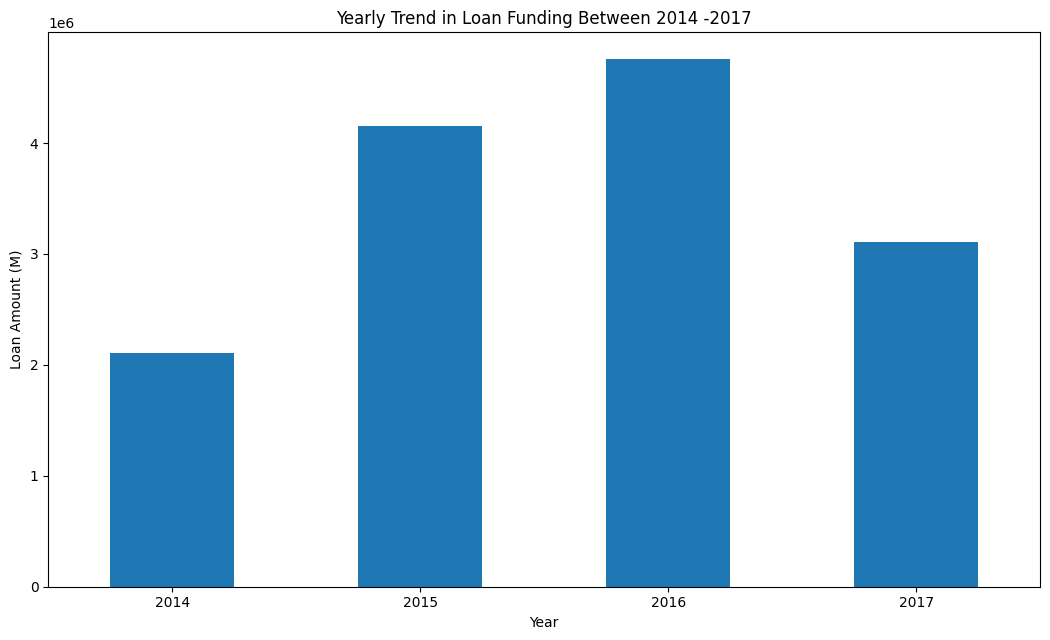

In [98]:
# continuos growth, low 2017 numbers likely due to incomplete data for 2017

yearly_trend['loan_amount_funded'].plot(kind='bar', xlabel= 'Year', ylabel='Loan Amount (M)', figsize=(12.8, 7.2))

plt.title('Yearly Trend in Loan Funding Between 2014 -2017')
plt.xticks(rotation=0)
plt.show()

In [99]:
timed_rwanda_data.funded_time.sort_values(ascending=True)

3871     2014-01-14 18:35:31+00:00
4015     2014-01-14 18:38:49+00:00
4090     2014-01-14 19:23:00+00:00
4227     2014-01-14 19:59:16+00:00
3934     2014-01-14 22:02:59+00:00
                    ...           
669175   2017-07-14 22:19:50+00:00
663942   2017-07-14 22:27:26+00:00
663733   2017-07-14 23:14:14+00:00
663646   2017-07-15 12:32:43+00:00
663515   2017-07-15 17:31:22+00:00
Name: funded_time, Length: 6183, dtype: datetime64[ns, UTC]

In [100]:
yearly_trend['fund_rate'] = yearly_trend['loan_amount_funded'] / yearly_trend['loan_amount_requested']
yearly_trend

,loans_count,loan_amount_requested,loan_amount_funded,fund_rate
funded_time,,,,
2014,1750,2105850,2105850,1.0
2015,1907,4153950,4153950,1.0
2016,1713,4759875,4759875,1.0
2017,762,3111225,3111225,1.0


#### Trends In Loan Funding Within The Years

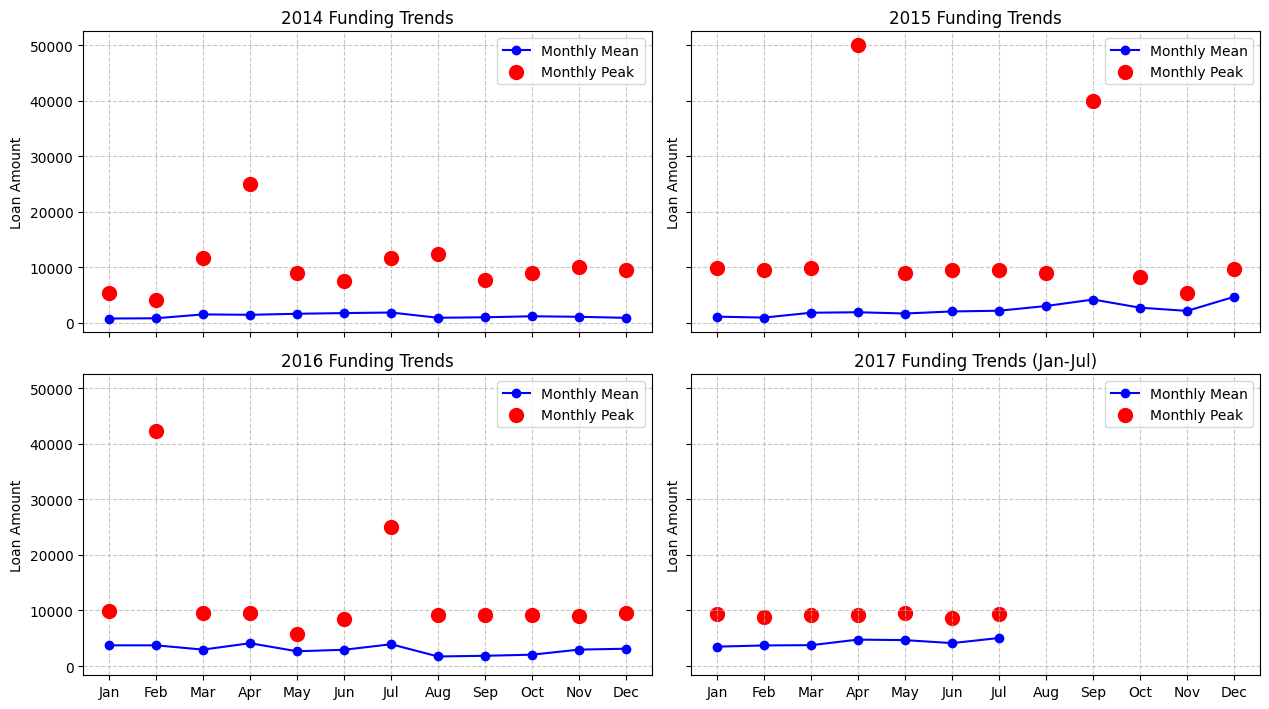

In [101]:
years = [2014, 2015, 2016]
fig, axes = plt.subplots(2, 2, figsize=(12.8, 7.2), sharey=True, sharex=True)
axes = axes.flatten()

for i, year in enumerate(years):
    year_data = timed_clean[timed_clean.funded_time.dt.year == year]
    
    monthly_stats = year_data.groupby(year_data.funded_time.dt.month).agg({
        'loan_amount': ['mean', 'max']
    })
    
    monthly_stats.columns = ['month_mean', 'month_max']
    monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
   
    axes[i].plot(monthly_stats.index, monthly_stats.month_mean, 'b-o', label='Monthly Mean')
    axes[i].scatter(monthly_stats.index, monthly_stats.month_max, color='red', s=100, 
                    label='Monthly Peak', zorder=5)
    axes[i].set_title(f'{year} Funding Trends')
    axes[i].set_ylabel('Loan Amount')
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend()


year_data_2017 = timed_clean[timed_clean.funded_time.dt.year == 2017]
monthly_stats_2017 = year_data_2017.groupby(year_data_2017.funded_time.dt.month).agg({
    'loan_amount': ['mean', 'max']
})

monthly_stats_2017.columns = ['month_mean', 'month_max']
monthly_stats.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[3].plot(monthly_stats.index[:7], monthly_stats_2017.month_mean, 'b-o', label='Monthly Mean')
axes[3].scatter(monthly_stats.index[:7], monthly_stats_2017.month_max, color='red', s=100, label='Monthly Peak')
axes[3].set_title('2017 Funding Trends (Jan-Jul)')
axes[3].set_ylabel('Loan Amount')
axes[3].grid(True, linestyle='--', alpha=0.7)
axes[3].legend()

plt.tight_layout()
plt.show()

### Language Processing Using NLTK

attempting to make sense and make use of text data in the use column. more robust tools/libraries will be considered in the future.

In [102]:
# some primitive nlp on the 'use' column using nltk

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

nltk.download(['punkt', 'stopwords', 'punkt_tab', 'averaged_perceptron_tagger_eng'])


[nltk_data] Downloading package punkt to /home/eebrhm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/eebrhm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/eebrhm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/eebrhm/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [103]:
text_rwanda_data = rwanda_data.dropna(subset=['use'])

In [104]:
trigger_words = ['buy', 'purchase', 'pay']
stop_words = set(stopwords.words('english'))

def get_buy_targets(text):
    tokens = word_tokenize(str(text).lower())   # label every word with its Part of Speech
    tagged_tokens = pos_tag(tokens)             # only keep words that are NOUNS

    
    # look for the nouns that appear after trigger_words in the original sentence
    targets = [w for w, tag in tagged_tokens if tag.startswith('N') and w not in stop_words]

    if any(w in tokens for w in trigger_words):
         return targets
    else:
        return []

text_rwanda_data['buy_targets'] = text_rwanda_data['use'].apply(get_buy_targets)
text_rwanda_data[['loan_amount', 'use', 'buy_targets']].head(10)

<positron-console-cell-104>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,loan_amount,use,buy_targets
3871,600.0,To buy more vegetables for sale.,"[vegetables, sale]"
3934,4000.0,"to buy more beans, rice, and maize to sell.","[beans, rice]"
4015,600.0,"to buy more rice, sugar, and charcoal to sell.","[rice, sugar, charcoal]"
4036,1200.0,to buy more glasses for sale.,"[glasses, sale]"
4090,600.0,to buy more beans and cooking oil for sale.,"[beans, oil, sale]"
4114,5325.0,"To buy more fish, rice, and cooking oil for re...","[rice, oil, resale]"
4227,450.0,To buy more beans and cooking oil to sell.,"[beans, oil]"
4276,600.0,to buy more bananas to sell.,[bananas]
4310,450.0,to buy more potatoes and cassava for sale.,"[potatoes, cassava, sale]"
4604,450.0,"to purchase potatoes, sugar, and rice for sale","[potatoes, sugar, rice, sale]"


In [105]:
exploded_text = text_rwanda_data.explode('buy_targets').dropna(subset=['buy_targets'])
bad_targets = ['sale', 'sell', 'maise'] # more efficient; don't have to rerun NLTK function on the whole dataset; just filter my results.
exploded_text = exploded_text[~exploded_text.buy_targets.isin(bad_targets)]
exploded_text[['loan_amount', 'use', 'buy_targets']].head(10)


,loan_amount,use,buy_targets
3871,600.0,To buy more vegetables for sale.,vegetables
3934,4000.0,"to buy more beans, rice, and maize to sell.",beans
3934,4000.0,"to buy more beans, rice, and maize to sell.",rice
4015,600.0,"to buy more rice, sugar, and charcoal to sell.",rice
4015,600.0,"to buy more rice, sugar, and charcoal to sell.",sugar
4015,600.0,"to buy more rice, sugar, and charcoal to sell.",charcoal
4036,1200.0,to buy more glasses for sale.,glasses
4090,600.0,to buy more beans and cooking oil for sale.,beans
4090,600.0,to buy more beans and cooking oil for sale.,oil
4114,5325.0,"To buy more fish, rice, and cooking oil for re...",rice


In [106]:
# accurate but not necessarily robust; typos; irrelevant values still made it through 
# and different words representing the same categories e.g. motorcycle, motorbike, bike

text_insight = exploded_text.groupby('buy_targets').loan_amount.agg(['count', 'mean', 'min', 'max']).sort_values(by='count', ascending=False)
text_insight.head(10)

,count,mean,min,max
buy_targets,,,,
rice,1176,2792.942177,25.0,12025.0
sugar,831,3193.110710,150.0,9975.0
beans,777,3020.238095,25.0,9975.0
maize,575,1505.782609,25.0,9050.0
sorghum,540,2774.074074,75.0,9475.0
community,528,2553.125000,250.0,6050.0
bananas,477,3026.624738,50.0,9575.0
oil,470,3198.723404,150.0,9975.0
fertilizers,448,1360.156250,25.0,8975.0


### Predictive Analytics using Linear Regression

Using linear regression to predict values for the remaining months in 2017. caution is taken to use each year as a unique data point using a timed index.

In [107]:
# some primitive ml to finish to wrap things up 
# using linear regression to estimate the total loan amount for 2017 using data from previous years
# handled the logic, got some help with the code

import numpy as np
from sklearn.linear_model import LinearRegression

# 1. Aggregate data with unique names for year and month
monthly_data = timed_clean.groupby([
    timed_clean.funded_time.dt.year.rename('year'), 
    timed_clean.funded_time.dt.month.rename('month')
])['loan_amount'].sum().reset_index().rename(columns={'loan_amount': 'total_loaned'})

# 2. Create a "Time Index" (1, 2, 3...) to show a continuous timeline
# This helps the model see the growth from 2014 through 2017
monthly_data['time_index'] = (monthly_data['year'] - 2014) * 12 + monthly_data['month']

# 3. Split into Train (data we have) and Test (months we want to predict)
# We know Jan 2014 to July 2017 is roughly indices 1 to 43
X_train = monthly_data[['time_index']] 
y_train = monthly_data['total_loaned']

# 4. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Create the "Future" indices for Aug-Dec 2017 (Months 44 to 48)
future_months = np.array([[44], [45], [46], [47], [48]])
predictions = model.predict(future_months)

# 6. Print the results
print("PREDICTIONS FOR MISSING 2017 MONTHS")
months_names = ["Aug", "Sep", "Oct", "Nov", "Dec"]
for name, pred in zip(months_names, predictions):
    print(f"{name} 2017: ${pred:,.2f}")

actual_2017_incomplete = y_train[monthly_data['year'] == 2017].sum()
predicted_2017_remainder = predictions.sum()
print(f"\nEstimated Total for 2017: ${actual_2017_incomplete + predicted_2017_remainder:,.2f}")



PREDICTIONS FOR MISSING 2017 MONTHS
Aug 2017: $503,190.37
Sep 2017: $511,125.13
Oct 2017: $519,059.89
Nov 2017: $526,994.65
Dec 2017: $534,929.42

Estimated Total for 2017: $5,706,524.46


/home/eebrhm/PTFLIO.2026/c38.project/.venv/lib64/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/eebrhm/PTFLIO.2026/c38.project/.venv/lib64/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


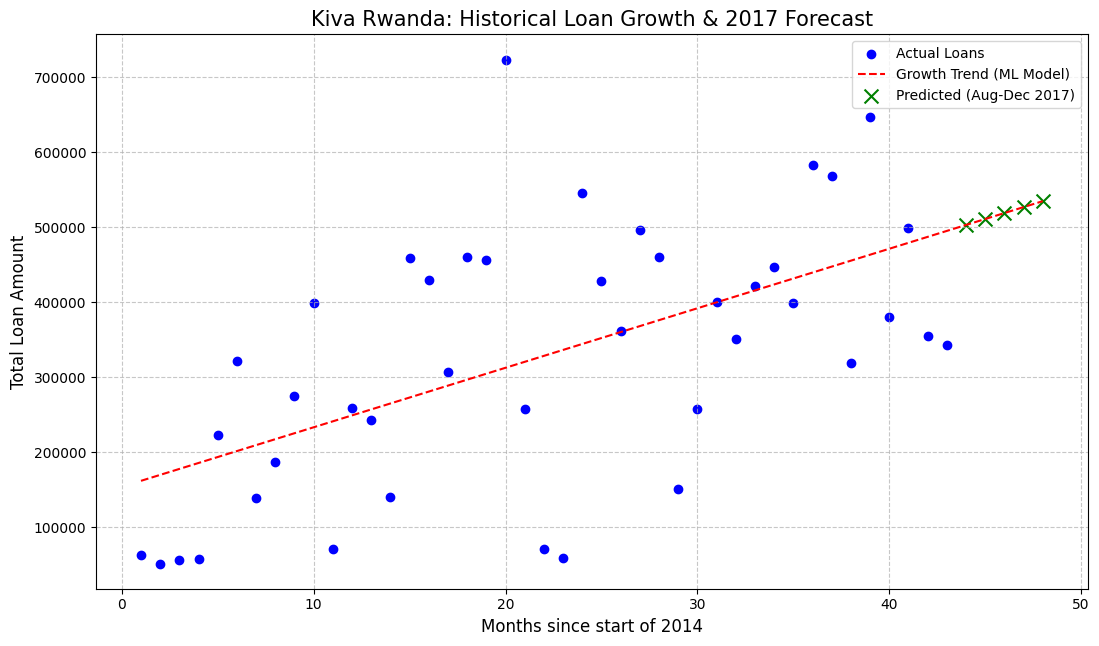

In [108]:
plt.figure(figsize=(12.8, 7.2))

# the historical actuals
plt.scatter(monthly_data['time_index'], monthly_data['total_loaned'], color='blue', label='Actual Loans')

# trendline using the model to predict values for the entire time range
all_time_indices = np.arange(monthly_data['time_index'].min(), 49).reshape(-1, 1)
trend_line = model.predict(all_time_indices)
plt.plot(all_time_indices, trend_line, color='red', linestyle='--', label='Growth Trend (ML Model)')

# the predictions
plt.scatter(range(44, 49), predictions, color='green', marker='x', s=100, label='Predicted (Aug-Dec 2017)')

plt.title('Kiva Rwanda: Historical Loan Growth & 2017 Forecast', fontsize=15)
plt.xlabel('Months since start of 2014', fontsize=12)
plt.ylabel('Total Loan Amount', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

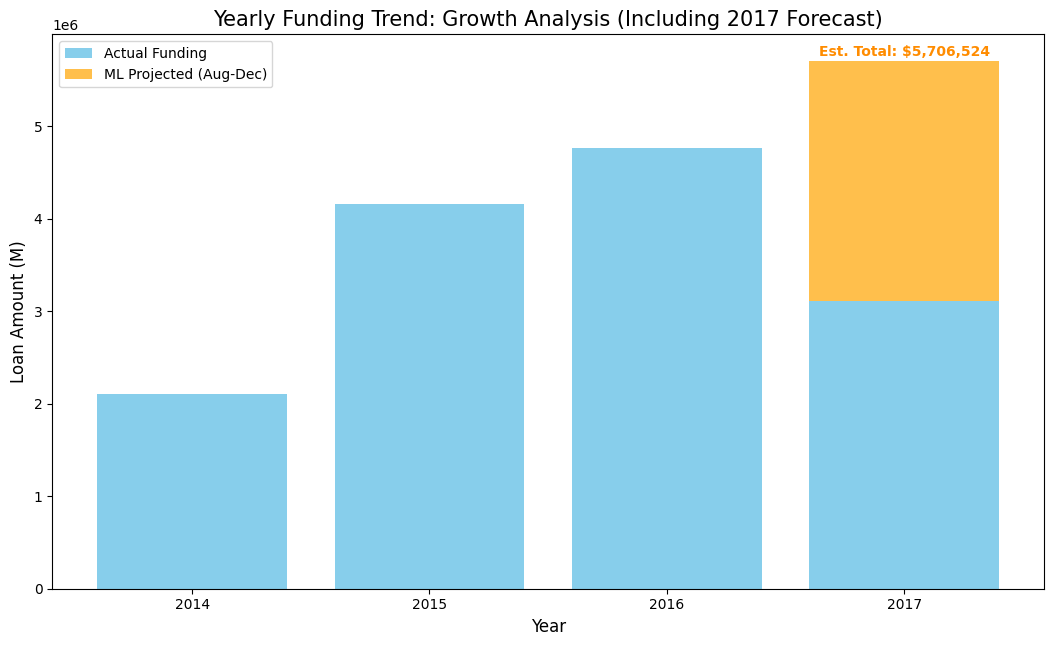

In [109]:

years = [2014, 2015, 2016, 2017]

# are the actual values from yearly_trend dataframe
actual_funding = [
    yearly_trend.loc[2014, 'loan_amount_funded'],
    yearly_trend.loc[2015, 'loan_amount_funded'],
    yearly_trend.loc[2016, 'loan_amount_funded'],
    yearly_trend.loc[2017, 'loan_amount_funded'] # This is the "incomplete" 3.1M
]

# 2. Create an array for the projected amount (0 for past years, X for 2017)
# Use the 'predicted_2017_remainder' we calculated in the ML step
projected_funding = [0, 0, 0, predicted_2017_remainder]

plt.figure(figsize=(12.8, 7.2))

# Plot the Actuals
plt.bar(years, actual_funding, color='skyblue', label='Actual Funding')

# Plot the Projected part ON TOP of the 2017 actual bar
plt.bar(years, projected_funding, bottom=actual_funding, 
        color='orange', alpha=0.7, label='ML Projected (Aug-Dec)')

plt.title('Yearly Funding Trend: Growth Analysis (Including 2017 Forecast)', fontsize=15)
plt.ylabel('Loan Amount (M)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(years)
plt.legend()

total_2017 = actual_funding[3] + projected_funding[3]
plt.text(2017, total_2017 + 50000, f'Est. Total: ${total_2017:,.0f}', 
         ha='center', fontweight='bold', color='darkorange')

plt.show()

### glad you made it to the very end.
a few things i learned while doing this project or more accurately since i started learning data science;
- computer science 'fundamentals' go a long way in understanding how computers work and how they work with code. i recommend the khan academy computer science with python playlist.
- you can run from numpy, with a lot of success actually, but it'll catch up somehow. you can tell by how far my numpy import statement is in the project.
- python is an object oriented programming language. good luck unpacking that statement everytime you run into a new object with its own methods.
- getting a hang of methods and attributes might take a while... .unique or .unique() ? interesting question
- understanding what your programming language can do and what tools you can use for what task even if you don't know exactly how to execute can still get you to where you want to go. ABSTRACTION.
- there is a synergistic relationship between objects in python that let you work with data in different ways. computer science fundamentals help tap into this synergy.
- *on use of ai*... mainly don't forget that you didn't write that code but don't let that weigh you down either. instead participate heavily in the code generation; supplying the logic and clarifying direction.
- before you use ai however, please learn how to read code. know when a variable has entered the scene, when a function has been defined, when a method has been called to a reasonable degree. this will help when reading code and over time in your understanding of program flows and in turn in ABSTRACTION.
- for data analysis and science, logic and critical thinking may matter more than your coding abilities. or maybe what i'm referring to as logic and critical thinking is just domain knowledge i didn't know.
- if you're a beginner like myself and not part of a formal education program trying to pick up programming skills try not to stay away from your ide for too long. or maybe i'm just one of those forgetful programmers.
- git is easy, actually ? from the terminal in your ide btw.
- almost forgot. get in touch with your ide. it can do so much. if you're a dumdum like me, but are on linux somehow, get your ide in a package that's native to your distro, none of that flatpak or appimage stuff. a 'native ide'/non-sandboxed ide integrates well with other stuff on your system like docker and postgres installations without you having to fiddle around to get things working. if you're on fedora positron has an .rpm package.
- the journey is long, despite having come a great length already. everything is 'primitive' right now, bordering imposterhood. 'not quite my tempo' > iterate > improve > joi. the math awaits ft the *practical statistics for data science* book and khan academy courses on linear algebra and calculus i think.

- tips and what not are welcome i.e. how can i improve my work/presentation etc. etc. or what projects/tools to look into for optimal returns.

### even more notes
- thank the good lord for git reset.